<a href="https://colab.research.google.com/github/Luis-Amagua/Visualizacion_datos_Python/blob/main/1_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('drive/MyDrive/CIENCIA DE DATOS/Datapath/Visualizacion de datos')

In [3]:
os.getcwd()

'/content/drive/MyDrive/CIENCIA DE DATOS/Datapath/Visualizacion de datos'

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df=pd.read_csv('./data/m2/hogar-data.csv', sep=";")
df.head()

,hashidhogar,area,numhab,gasviv,latitud,longitud
0,7c26d5d122b6129c4580c0d21cb708f2b373a05e0db56a...,2,7,47000,-6.279874,-79.547844
1,93f524ce17d35ba95cc5997a016f507c2ae7bf5521c4a2...,2,7,56000,-7.673199,-78.194168
2,330651fb35a7aaa952785f1f8dc9f506a1ff9ef6ae0ce1...,2,4,54000,-5.314705,-78.735115
3,dd9b4285b385d9e1f65a8b749527f56da1e8455379b47d...,1,10,82000,-5.739996,-77.906250
4,0b4b1ee22f1c588f52a94fd2a5d7d5f363459cede9fda4...,1,6,143000,-6.228831,-77.869240


In [33]:
# cambiar tipo de area por urbano y rural
df['area']=df['area'].map({1:'urbano',2:'rural'})


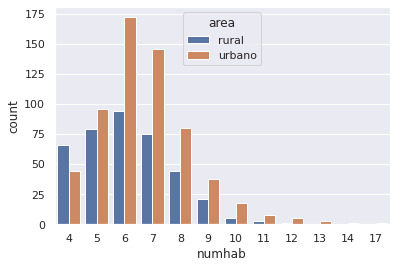

In [34]:
# settings
sns.set_theme()

sns.countplot(data=df, x='numhab', hue='area')
plt.show()

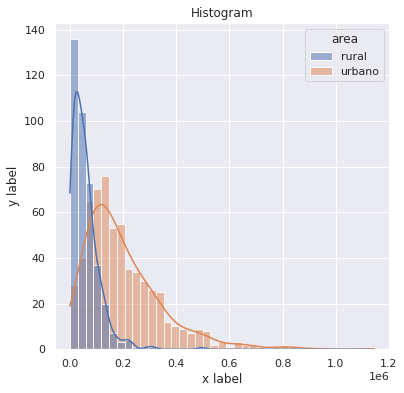

In [35]:
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='gasviv', hue='area', kde='True')
plt.title('Histogram')
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

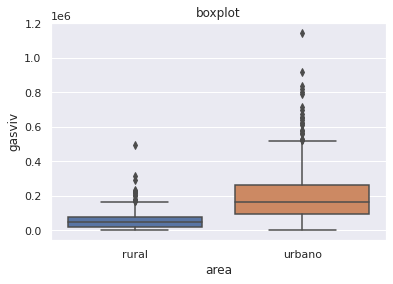

In [36]:
sns.boxplot(data=df, x='area', y='gasviv', orient='v')
plt.title('boxplot')
plt.show()

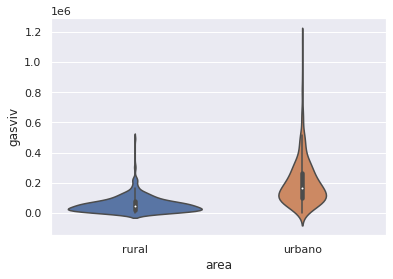

In [37]:
sns.violinplot(data=df, x='area',y='gasviv')


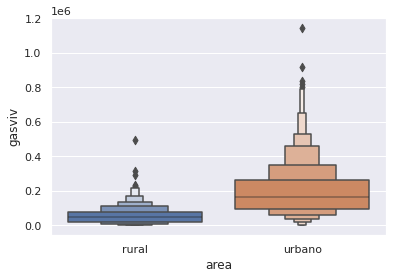

In [38]:
sns.boxenplot(data=df, x='area',y='gasviv')

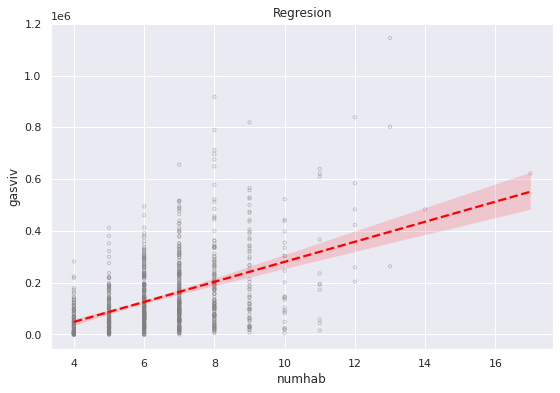

In [49]:
plt.figure(figsize=(9,6))
scatter_kws={'color':'none', 'alpha':0.4, 'edgecolors':'grey', 's':10} # alpha=transparecnia #edgecolor cambia colores de borde de circulos
line_kws={'color':'red' , 'linestyle':'--'}
sns.regplot(data=df, x='numhab', y='gasviv', marker='o', scatter_kws=scatter_kws, line_kws=line_kws)
plt.title('Regresion')
plt.show()

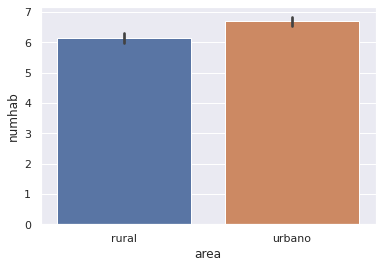

In [50]:
sns.barplot(data=df, x='area',y='numhab')

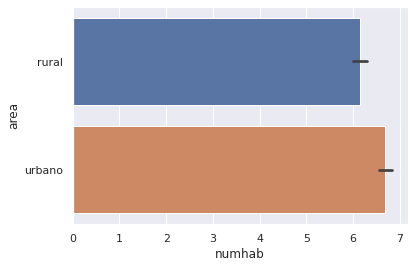

In [52]:
sns.barplot(data=df,x='numhab',y='area', orient='h')

## subpots

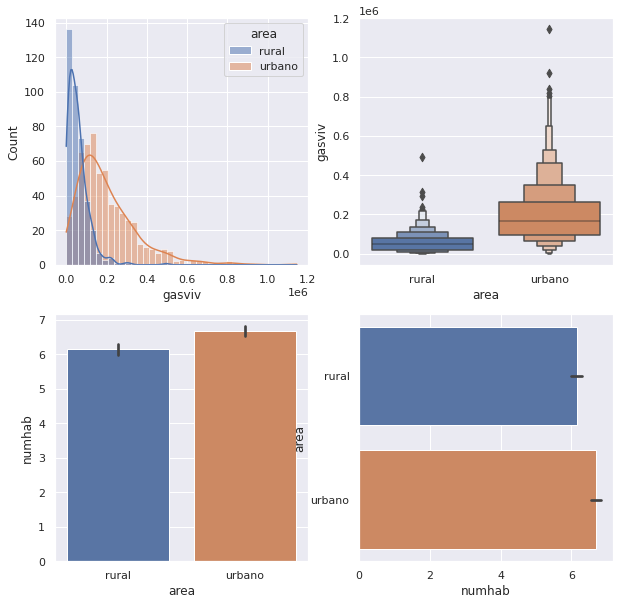

In [65]:
fig, ax=plt.subplots(2,2,figsize=(10,10))

sns.histplot(data=df, x='gasviv', hue='area', kde='True', ax=ax[0,0])
sns.boxenplot(data=df, x='area',y='gasviv', ax=ax[0,1])
sns.barplot(data=df, x='area',y='numhab',ax=ax[1,0])
sns.barplot(data=df,x='numhab',y='area', orient='h',ax=ax[1,1])

#etiquetas
ax[1,0].set_title='Densidad'
ax[1,0].set_xlabel='xlabel'
ax[1,0].set_yabel='ylabel'
plt.show()

In [68]:
tmp_df=df[['area','numhab','gasviv']].copy()   #para que los cambios no afecten al original
tmp_df.head()

,area,numhab,gasviv
0,rural,7,47000
1,rural,7,56000
2,rural,4,54000
3,urbano,10,82000
4,urbano,6,143000


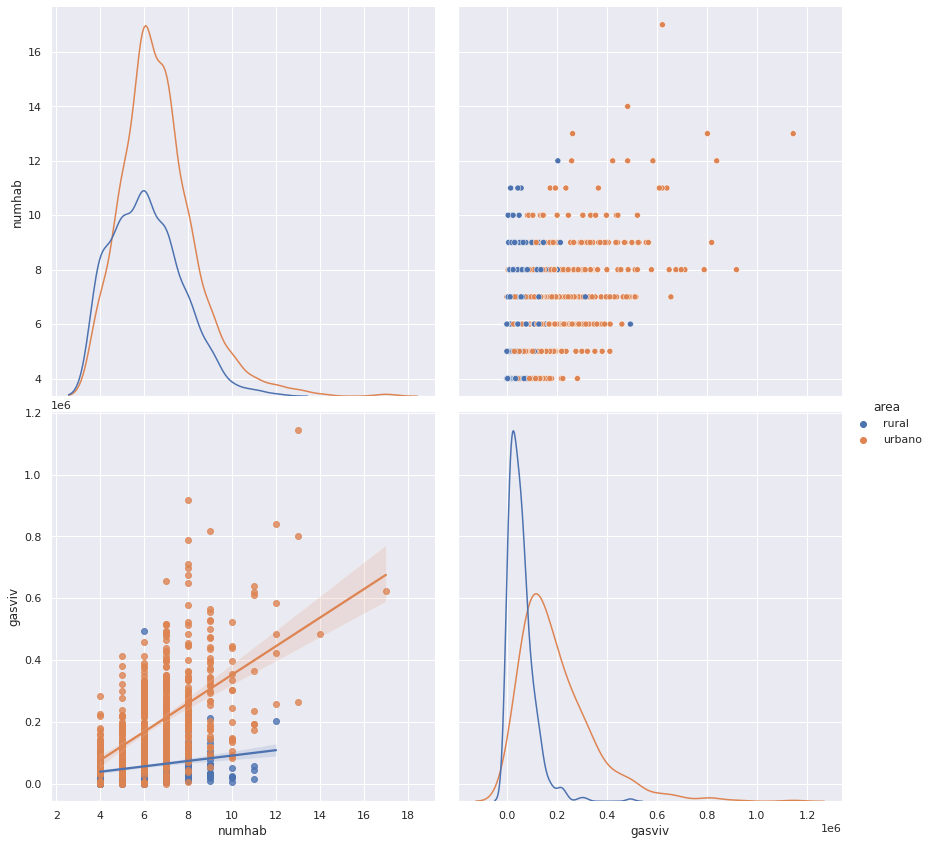

In [76]:
g=sns.PairGrid(data=tmp_df, hue='area', height=6, diag_sharey=False)
g.map_lower(sns.regplot )
g.map_diag(sns.kdeplot)
g.map_upper(sns.scatterplot)

g.add_legend()
plt.show()

## correlacion

In [77]:
df.head()

,hashidhogar,area,numhab,gasviv,latitud,longitud
0,7c26d5d122b6129c4580c0d21cb708f2b373a05e0db56a...,rural,7,47000,-6.279874,-79.547844
1,93f524ce17d35ba95cc5997a016f507c2ae7bf5521c4a2...,rural,7,56000,-7.673199,-78.194168
2,330651fb35a7aaa952785f1f8dc9f506a1ff9ef6ae0ce1...,rural,4,54000,-5.314705,-78.735115
3,dd9b4285b385d9e1f65a8b749527f56da1e8455379b47d...,urbano,10,82000,-5.739996,-77.906250
4,0b4b1ee22f1c588f52a94fd2a5d7d5f363459cede9fda4...,urbano,6,143000,-6.228831,-77.869240


In [82]:
corr_df=pd.get_dummies(df, columns=['area'], drop_first=False) # genero dummies en funcion de area
# drop_first elimina la primera columna porque se sobreentiendo ya que hay dos categorias
corr_df.head()

,hashidhogar,numhab,gasviv,latitud,longitud,area_rural,area_urbano
0,7c26d5d122b6129c4580c0d21cb708f2b373a05e0db56a...,7,47000,-6.279874,-79.547844,1,0
1,93f524ce17d35ba95cc5997a016f507c2ae7bf5521c4a2...,7,56000,-7.673199,-78.194168,1,0
2,330651fb35a7aaa952785f1f8dc9f506a1ff9ef6ae0ce1...,4,54000,-5.314705,-78.735115,1,0
3,dd9b4285b385d9e1f65a8b749527f56da1e8455379b47d...,10,82000,-5.739996,-77.906250,0,1
4,0b4b1ee22f1c588f52a94fd2a5d7d5f363459cede9fda4...,6,143000,-6.228831,-77.869240,0,1


In [84]:
# se sacara una matriz de correlacion son variables cualitativas
corr_df.drop(['latitud','longitud'],axis=1)

,hashidhogar,numhab,gasviv,area_rural,area_urbano
0,7c26d5d122b6129c4580c0d21cb708f2b373a05e0db56a...,7,47000,1,0
1,93f524ce17d35ba95cc5997a016f507c2ae7bf5521c4a2...,7,56000,1,0
2,330651fb35a7aaa952785f1f8dc9f506a1ff9ef6ae0ce1...,4,54000,1,0
3,dd9b4285b385d9e1f65a8b749527f56da1e8455379b47d...,10,82000,0,1
4,0b4b1ee22f1c588f52a94fd2a5d7d5f363459cede9fda4...,6,143000,0,1
...,...,...,...,...,...
995,3e12f1a568a876919ce31ef97101033448ae7535e796d6...,7,13000,1,0
996,e72ca5655308bfefa8f9d10866efa177f18cca6de0d79e...,6,128000,1,0
997,69bb90ef5e847f155a373e8f30c0b3e9623a108d78cb43...,7,128000,1,0
998,68a85fd708f865c0e88319a82279e87890d50bb48ae178...,4,91000,0,1


In [87]:
# matriz de correlaciones
c_matrix=corr_df.drop(['latitud','longitud'],axis=1).corr()
c_matrix

,numhab,gasviv,area_rural,area_urbano
numhab,1.000000,0.464434,-0.156055,0.156055
gasviv,0.464434,1.000000,-0.494442,0.494442
area_rural,-0.156055,-0.494442,1.000000,-1.000000
area_urbano,0.156055,0.494442,-1.000000,1.000000


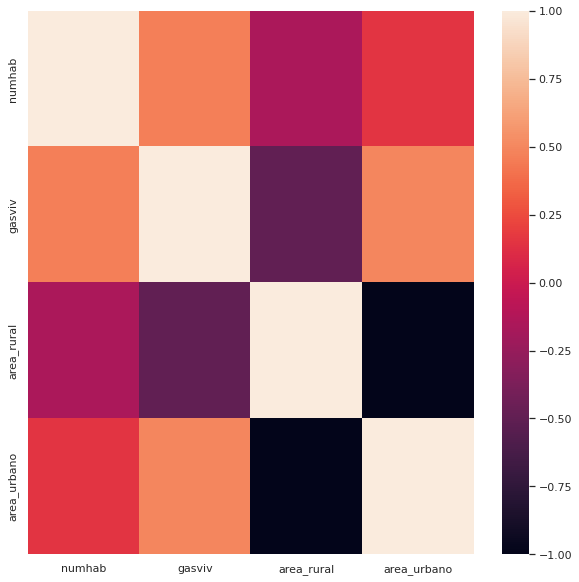

In [90]:
plt.figure(figsize=(10,10))
hmap=sns.heatmap(c_matrix)

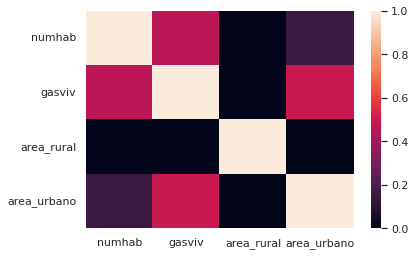

In [91]:
hmap=sns.heatmap(c_matrix, vmin=0) # valor minimo cero

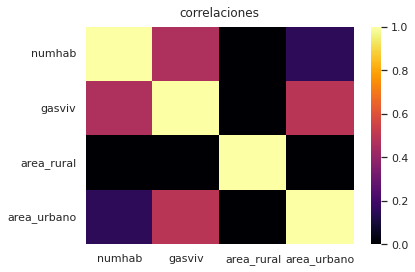

In [99]:
hmap=sns.heatmap(c_matrix, vmin=0, vmax=1, cmap='inferno')
hmap.set_title('correlaciones', fontdict={'fontsize':12},pad=10)  #fontsize tamaño de letra # pad distancia del title al grafico
plt.show()